In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset_train = pd.read_csv('AAPL.csv')
training_set = dataset_train.iloc[:, 1:2].values

dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-25,243.160004,246.729996,242.880005,246.580002,245.841919,18369300
1,2019-10-24,244.509995,244.800003,241.809998,243.580002,242.850891,17318800
2,2019-10-23,242.100006,243.240005,241.220001,243.179993,242.452087,18957200
3,2019-10-22,241.160004,242.199997,239.619995,239.960007,239.241745,20573400
4,2019-10-21,237.520004,240.990005,237.320007,240.509995,239.790085,21811800


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 2049):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (y_train.shape[0], X_train.shape[1], 1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [6]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences  = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1989/1989 [==============================] - 6s 3ms/step - loss: 0.0165
Epoch 2/100
1989/1989 [==============================] - 5s 2ms/step - loss: 0.0037
Epoch 3/100
1989/1989 [==============================] - 5s 2ms/step - loss: 0.0032
Epoch 4/100
1989/1989 [==============================] - 5s 2ms/step - loss: 0.0026
Epoch 5/100
1989/1989 [==============================] - 6s 3ms/step - loss: 0.0029
Epoch 6/100
1989/1989 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 7/100
1989/1989 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 8/100
1989/1989 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 9/100
1989/1989 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 10/100
1989/1989 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 11/100
1989/1989 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 12/100
1989/1989 [==============================] - 5s 3ms/step - lo

Epoch 95/100
1989/1989 [==============================] - 5s 2ms/step - loss: 7.1465e-04
Epoch 96/100
1989/1989 [==============================] - 5s 3ms/step - loss: 6.8064e-04
Epoch 97/100
1989/1989 [==============================] - 5s 3ms/step - loss: 6.8939e-04
Epoch 98/100
1989/1989 [==============================] - 5s 3ms/step - loss: 6.0006e-04
Epoch 99/100
1989/1989 [==============================] - 5s 2ms/step - loss: 7.0668e-04
Epoch 100/100
1989/1989 [==============================] - 5s 2ms/step - loss: 6.7384e-04


In [7]:
dataset_test = pd.read_csv('AAPL-TEST.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


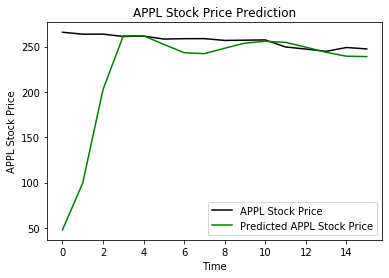

In [8]:
plt.plot(real_stock_price, color = 'black', label = 'APPL Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted APPL Stock Price')
plt.title('APPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPL Stock Price')
plt.legend()
plt.show()